In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
!pip install textblob
!pip install tweepy
!pip install wordcloud


In [2]:
from textblob import TextBlob
from wordcloud import WordCloud
import tweepy
import wordcloud

In [3]:
tweets = pd.read_csv('all_tweets.csv')

In [4]:
tweets.head(5)

,Unnamed: 0,sentiment,text,user,label
0,0,positive,RT @SchudioTv: Want to know more about #autism...,beyondbehaviour,anxiety
1,1,negative,We blame ourselves and feel worse. Start with ...,cherie7c,anxiety
2,2,positive,"RT @PsychiatristCNS: 130,000 patient years and...",ThinkNeha,anxiety
3,3,neutral,RT @SkypeTherapist: See a therapist online ove...,FrankCoulson7,anxiety
4,4,positive,"RT @PsychiatristCNS: 130,000 patient years and...",Phcourtet,anxiety


In [5]:
tweets['text'].head()

0    RT @SchudioTv: Want to know more about #autism...
1    We blame ourselves and feel worse. Start with ...
2    RT @PsychiatristCNS: 130,000 patient years and...
3    RT @SkypeTherapist: See a therapist online ove...
4    RT @PsychiatristCNS: 130,000 patient years and...
Name: text, dtype: object

In [6]:
tweets['combined']=tweets['sentiment'].astype(str)+', '+tweets['label']


In [7]:
tweets.head()

,Unnamed: 0,sentiment,text,user,label,combined
0,0,positive,RT @SchudioTv: Want to know more about #autism...,beyondbehaviour,anxiety,"positive, anxiety"
1,1,negative,We blame ourselves and feel worse. Start with ...,cherie7c,anxiety,"negative, anxiety"
2,2,positive,"RT @PsychiatristCNS: 130,000 patient years and...",ThinkNeha,anxiety,"positive, anxiety"
3,3,neutral,RT @SkypeTherapist: See a therapist online ove...,FrankCoulson7,anxiety,"neutral, anxiety"
4,4,positive,"RT @PsychiatristCNS: 130,000 patient years and...",Phcourtet,anxiety,"positive, anxiety"


In [8]:
tweets.drop(columns=['combined'], inplace=True)

In [9]:
tweets.head()

,Unnamed: 0,sentiment,text,user,label
0,0,positive,RT @SchudioTv: Want to know more about #autism...,beyondbehaviour,anxiety
1,1,negative,We blame ourselves and feel worse. Start with ...,cherie7c,anxiety
2,2,positive,"RT @PsychiatristCNS: 130,000 patient years and...",ThinkNeha,anxiety
3,3,neutral,RT @SkypeTherapist: See a therapist online ove...,FrankCoulson7,anxiety
4,4,positive,"RT @PsychiatristCNS: 130,000 patient years and...",Phcourtet,anxiety


In [10]:
#data = tweets.loc[tweets["sentiment"] != 'neutral']

In [11]:
#data

##### Clean the text

In [12]:
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'RT[\s]+','', text)
    text = re.sub(r'https?:\/\/\S+', '', text)
    
    return text

tweets['text'] = tweets['text'].apply(cleanTxt)


    

In [13]:
tweets.head()

,Unnamed: 0,sentiment,text,user,label
0,0,positive,: Want to know more about autism and anxiety? ...,beyondbehaviour,anxiety
1,1,negative,We blame ourselves and feel worse. Start with ...,cherie7c,anxiety
2,2,positive,": 130,000 patient years and the diagnostic sta...",ThinkNeha,anxiety
3,3,neutral,: See a therapist online over Skype - Learn Ho...,FrankCoulson7,anxiety
4,4,positive,": 130,000 patient years and the diagnostic sta...",Phcourtet,anxiety


In [14]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [15]:
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [16]:
tweets['subjectivity'] = tweets['text'].apply(getSubjectivity)

In [17]:
tweets['polarity'] = tweets['text'].apply(getPolarity)

In [18]:
tweets

,Unnamed: 0,sentiment,text,user,label,subjectivity,polarity
0,0,positive,: Want to know more about autism and anxiety? ...,beyondbehaviour,anxiety,0.400000,0.250
1,1,negative,We blame ourselves and feel worse. Start with ...,cherie7c,anxiety,0.600000,-0.400
2,2,positive,": 130,000 patient years and the diagnostic sta...",ThinkNeha,anxiety,0.350000,0.050
3,3,neutral,: See a therapist online over Skype - Learn Ho...,FrankCoulson7,anxiety,0.000000,0.000
4,4,positive,": 130,000 patient years and the diagnostic sta...",Phcourtet,anxiety,0.350000,0.050
...,...,...,...,...,...,...,...
6027,93,negative,"_Alias: 2/3\nI noticed something,though;w/each...",FromOneLine,stress,0.500000,0.500
6028,94,negative,Was there a collective bad day today? Everyone...,lumieart,stress,0.841667,-0.525
6029,95,positive,wen i’m sad I literally got no one to talk to ...,_floracostaa,stress,1.000000,0.050
6030,96,positive,_a_mess_2020 Oh wow more stuff proving you...,Exreenx,stress,0.750000,0.300


##### Plot word cloud

In [19]:
all_words = ' '.join( [ twts for twts in tweets['text']])
wordcloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(all_words)

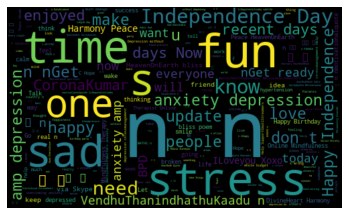

In [20]:
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

##### Check the accuracy of negativ, neutral and positive analysis values that have been provided.

In [21]:
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

tweets['Analysis'] = tweets['polarity'].apply(getAnalysis)

In [22]:
tweets.head(10)

,Unnamed: 0,sentiment,text,user,label,subjectivity,polarity,Analysis
0,0,positive,: Want to know more about autism and anxiety? ...,beyondbehaviour,anxiety,0.40,0.25,Positive
1,1,negative,We blame ourselves and feel worse. Start with ...,cherie7c,anxiety,0.60,-0.40,Negative
2,2,positive,": 130,000 patient years and the diagnostic sta...",ThinkNeha,anxiety,0.35,0.05,Positive
3,3,neutral,: See a therapist online over Skype - Learn Ho...,FrankCoulson7,anxiety,0.00,0.00,Neutral
4,4,positive,": 130,000 patient years and the diagnostic sta...",Phcourtet,anxiety,0.35,0.05,Positive
5,5,neutral,The onset of the pandemic &amp; WFH has led to...,ajhospitalmng,anxiety,0.00,0.00,Neutral
6,6,neutral,Climate change is concerning. \n\nThese can cr...,585Mentalhealth,anxiety,0.00,0.00,Neutral
7,7,positive,"130,000 patient years and the diagnostic stabi...",PsychiatristCNS,anxiety,0.35,0.05,Positive
8,8,neutral,Looking for online counseling via Skype? Skype...,SkypeTherapist,anxiety,0.00,0.00,Neutral
9,9,neutral,: Just sharing my thoughts😊 @_lgtwo Trending...,TrioMinutes,anxiety,0.00,0.00,Neutral


In [23]:
tweets.drop(columns=['sentiment'], inplace=True)

##### Print all the positive tweets

In [29]:
j = 1
sortedDF = tweets.sort_values(by=['polarity'])
sortedDf = sortedDF.head(10)
for i in range (0, sortedDf.shape[0]):
    if(sortedDF['Analysis'][i] == 'Positive'):
        print(str(j) + ') ' + sortedDF['text'][i])
        print()
        j=j+1


1) : Want to know more about autism and anxiety? Watch this short clip below...\n\nClick here to enrol ➡️ 

2) : 130,000 patient years and the diagnostic stability of BipolarDisorder: Study finds frequent dx shifts related to BD,…

3) : 130,000 patient years and the diagnostic stability of BipolarDisorder: Study finds frequent dx shifts related to BD,…

4) 130,000 patient years and the diagnostic stability of BipolarDisorder: Study finds frequent dx shifts related to B… 



In [30]:
sortedDf

,Unnamed: 0,text,user,label,subjectivity,polarity,Analysis
2528,57,: anxiety exercise - When you feel overwhelmed...,RichardGillies9,depression,1.000000,-1.00,Negative
2515,44,Remember when Queenie said Madison probably of...,NINETIESWITCH,depression,1.000000,-1.00,Negative
2911,56,"Blessed are ye, when men shall revile you, and...",HisBrightFame,happy,1.000000,-1.00,Negative
1271,2,Nope. Me too! And had terrible nights sleep...,L12_W,anxiety,1.000000,-1.00,Negative
402,73,Washington Post's Jennifer Rubin attacks Polit...,AnyPollApp,anxiety,1.000000,-1.00,Negative
2522,51,What a bad weekend. I hate it. Depression repo...,BANDOS7de,depression,0.783333,-0.85,Negative
1380,16,I hate everyone here. I'm going to hurt someo...,Iamdepr47974144,depression,0.900000,-0.80,Negative
2206,16,I hate everyone here. I'm going to hurt someo...,Iamdepr47974144,depression,0.900000,-0.80,Negative
2016,16,I hate everyone here. I'm going to hurt someo...,Iamdepr47974144,depression,0.900000,-0.80,Negative
2301,16,I hate everyone here. I'm going to hurt someo...,Iamdepr47974144,depression,0.900000,-0.80,Negative


In [ ]:
j = 1
sortedDF = tweets.sort_values(by=['polarity'], ascending = 'FALSE')
sortedDF = sortedDF.head(5)
for i in range (0, sortedDF.shape[0]):
    if(sortedDF['Analysis'][i] == 'Negative'):
        print(str(j) + ') ' + sortedDF['text'][i])
        print()
        j=j+1

In [ ]:
sortedDF

##### Plot the polarity and subjectivity - 0.00 = Neutral

In [ ]:
plt.figure(figsize=(16,8))
for i in range(0, tweets.shape[0]):
    plt.scatter(tweets['polarity'][i], tweets['subjectivity'][i], color='blue' )
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


##### Percentage of positive and negative tweets

In [ ]:
ptweets = tweets[tweets.Analysis == 'Positive']
ptweets = ptweets['text']

print(ptweets)

In [ ]:
round (  (ptweets.shape[0]/ tweets.shape[0])*100, 1)

In [ ]:
ntweets = tweets[tweets.Analysis == 'Negative']
round (  (ntweets.shape[0]/ tweets.shape[0])*100, 1)

In [ ]:
tweets['Analysis'].value_counts()

In [ ]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')

tweets['Analysis'].value_counts().plot(kind='bar', figsize=(10,8))


In [ ]:
Fn = tweets[["Analysis", "label"]]

In [ ]:
Fn.value_counts().plot(kind='bar', color = 'green', figsize=(16,8))
